<a href="https://colab.research.google.com/github/ERTUGRULBRN/Tiroit-Makine-renmesi/blob/main/cnn_tiroid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

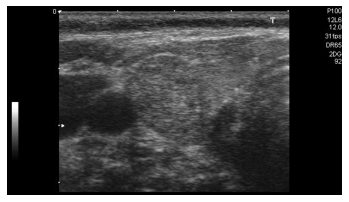

(315, 560, 3)
NumberOfClass:  2
Found 39 images belonging to 2 classes.
Found 10 images belonging to 2 classes.
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


3/3 [==============================] - 2s 365ms/step - loss: 0.7775 - accuracy: 0.4802 - val_loss: 0.6254 - val_accuracy: 0.7000
Epoch 2/10
3/3 [==============================] - 0s 133ms/step - loss: 0.6240 - accuracy: 0.7027 - val_loss: 0.6329 - val_accuracy: 0.7000
Epoch 3/10
3/3 [==============================] - 0s 151ms/step - loss: 0.6113 - accuracy: 0.7469 - val_loss: 0.6210 - val_accuracy: 0.7000
Epoch 4/10
3/3 [==============================] - 0s 171ms/step - loss: 0.6406 - accuracy: 0.7254 - val_loss: 0.6201 - val_accuracy: 0.7000
Epoch 5/10
3/3 [==============================] - 0s 172ms/step - loss: 0.5613 - accuracy: 0.6757 - val_loss: 0.6454 - val_accuracy: 0.7000
Epoch 6/10
3/3 [==============================] - 0s 166ms/step - loss: 0.5391 - accuracy: 0.6886 - val_loss: 0.7647 - val_accuracy: 0.7000
Epoch 7/10
3/3 [==============================] - 0s 180ms/step - loss: 0.7503 - accuracy: 0.5709 - val_loss: 0.6526 - val_accuracy: 0.7000
Epoch 8/10
3/3 [===============

In [8]:
from keras.models import Sequential # model oluşturma 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense # cnn katmanları tanımalaması
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img # fotoğraflar üzerinde işlem yapma
import matplotlib.pyplot as plt #  görselleştirme işlemi
from glob import glob

train_path = "/content/drive/MyDrive/veriler/training_set" # training yapabilmek için datasetimizden çağırıyoruz
test_path = "/content/drive/MyDrive/veriler/test_set"   # test yapabilmek için datasetimizden çağırıyoruz   

img = load_img(train_path +"/bening/resim.jpg") # fotoğrafı çağırıyoruz
plt.imshow(img)
plt.axis("off")
plt.show()  # fotoğrafı bastırıyoruz 

x = img_to_array(img)
print(x.shape)

className = glob(train_path + '/*' )
numberOfClass = len(className)
print("NumberOfClass: ",numberOfClass)

model = Sequential() # model oluşturma işlemine başlıyoruz
model.add(Conv2D(32,(3,3),input_shape = (64, 64, 3))) #evrişim katmanı başlatılıyor ve havuzlama işlemi devamında yapılıyor  
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten()) # düzleştirme kısmı uygulanıyor 
model.add(Dense(1024)) #
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output
model.add(Activation("softmax"))

model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

batch_size = 16

train_datagen = ImageDataGenerator(rescale= 1./255, #fotoğrafın üzerinde değişiklik yapılıyor 
                   shear_range = 0.2,
                   horizontal_flip=True,
                   zoom_range = 0.2)

test_datagen = ImageDataGenerator(rescale= 1./255)

train_generator = train_datagen.flow_from_directory( # hedef boyutlar ve fotoğrafların çıktıları üzerinde ayarlama yapılıyor 
        train_path, 
        target_size=(64, 64),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_path, 
        target_size=(64, 64),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

hist = model.fit_generator(  # modelin çalışması ve sınıflandırma  işlemi ile yapılanlar ile doğruluk oranı hesaplanması. 
        generator = train_generator,
        steps_per_epoch = 49 // batch_size,
        epochs=10,
        validation_data = test_generator,
        validation_steps = 30 // batch_size)


